# Elastic Net Regression Returns


[*********************100%***********************]  1 of 1 completed

Fitting 5 folds for each of 50 candidates, totalling 250 fits


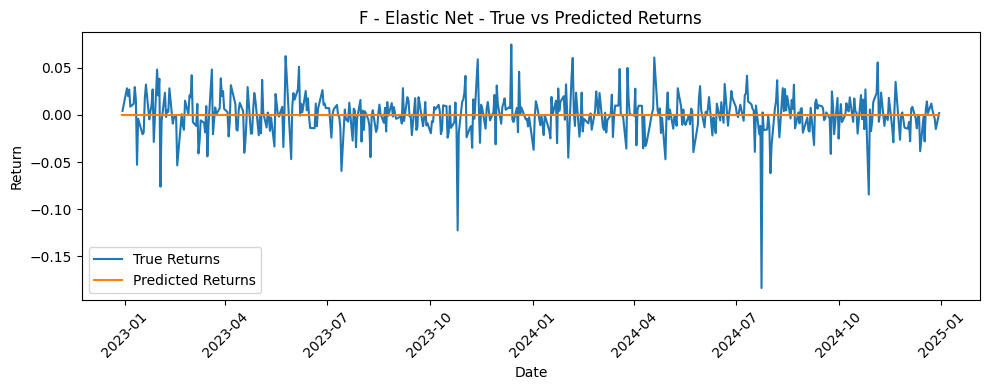

[*********************100%***********************]  1 of 1 completed

Fitting 5 folds for each of 50 candidates, totalling 250 fits


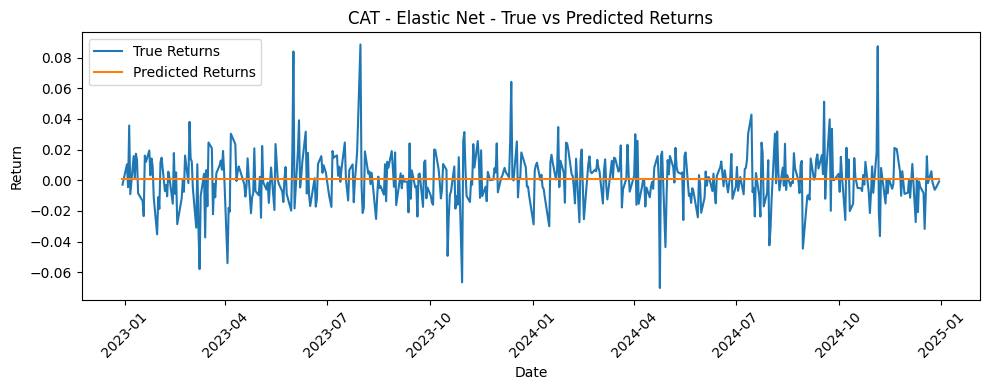

[*********************100%***********************]  1 of 1 completed

Fitting 5 folds for each of 50 candidates, totalling 250 fits


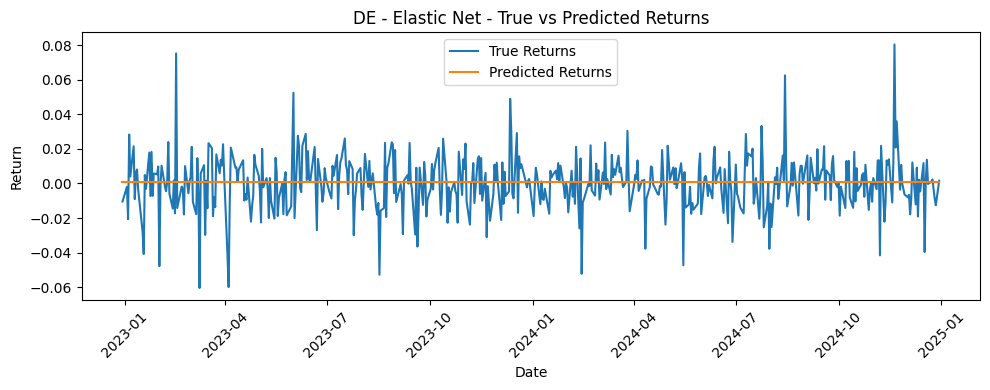

[*********************100%***********************]  1 of 1 completed

Fitting 5 folds for each of 50 candidates, totalling 250 fits


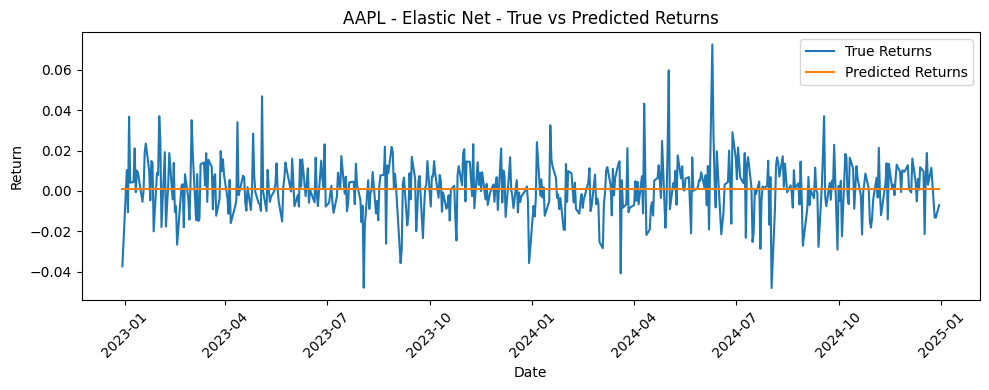

[*********************100%***********************]  1 of 1 completed

Fitting 5 folds for each of 50 candidates, totalling 250 fits


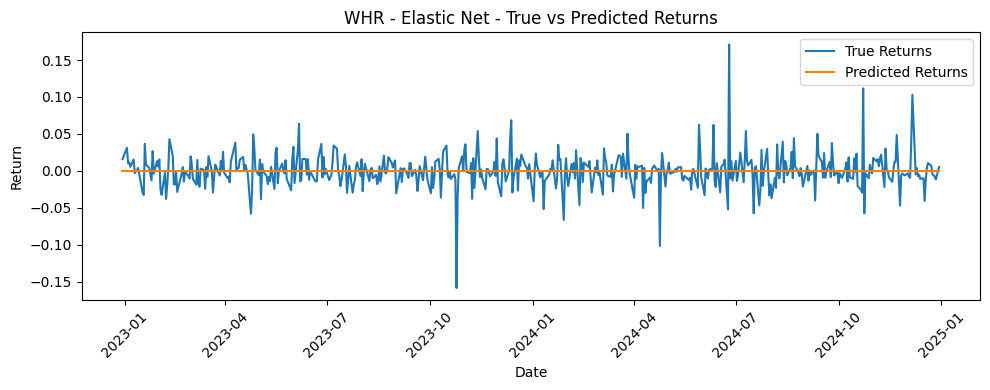

[*********************100%***********************]  1 of 1 completed

Fitting 5 folds for each of 50 candidates, totalling 250 fits


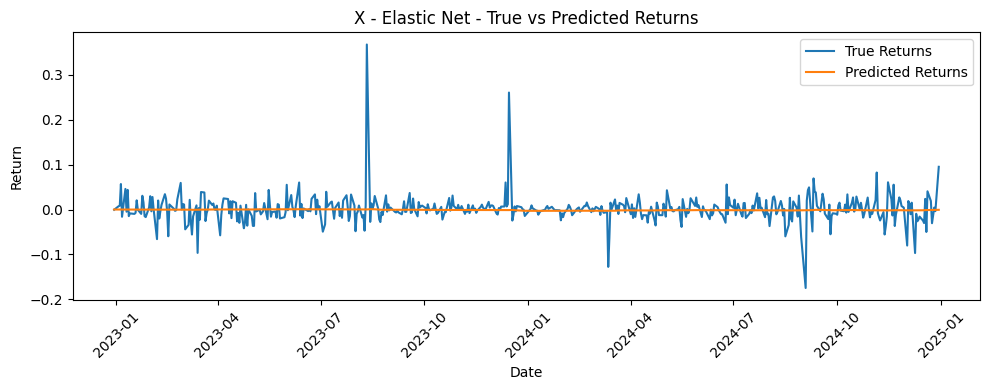

[*********************100%***********************]  1 of 1 completed

Fitting 5 folds for each of 50 candidates, totalling 250 fits


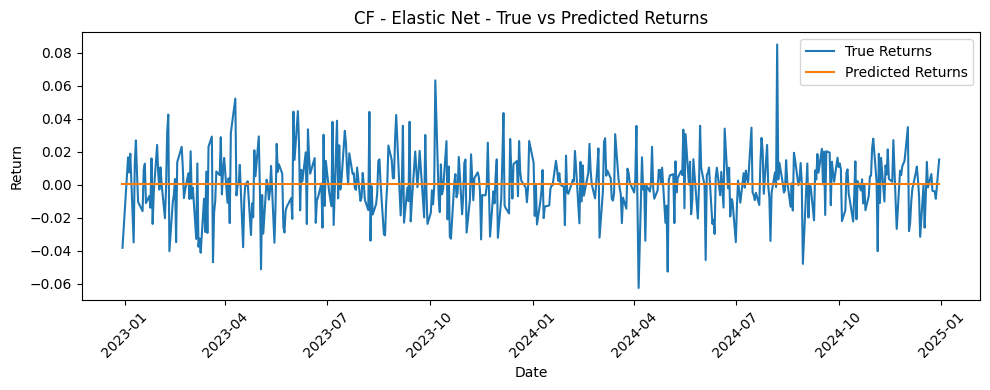

[*********************100%***********************]  1 of 1 completed

Fitting 5 folds for each of 50 candidates, totalling 250 fits


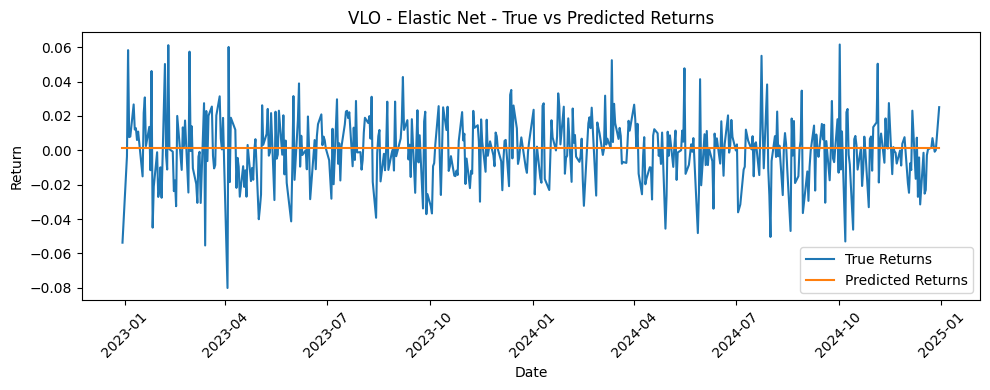

[*********************100%***********************]  1 of 1 completed

Fitting 5 folds for each of 50 candidates, totalling 250 fits


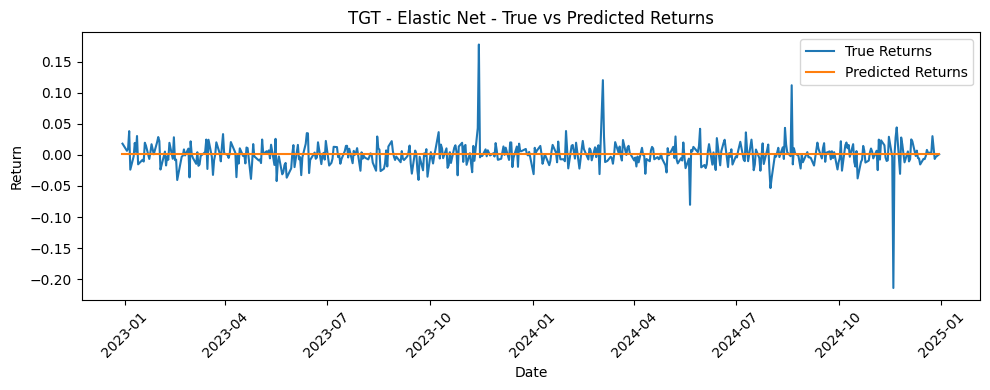

[*********************100%***********************]  1 of 1 completed

Fitting 5 folds for each of 50 candidates, totalling 250 fits


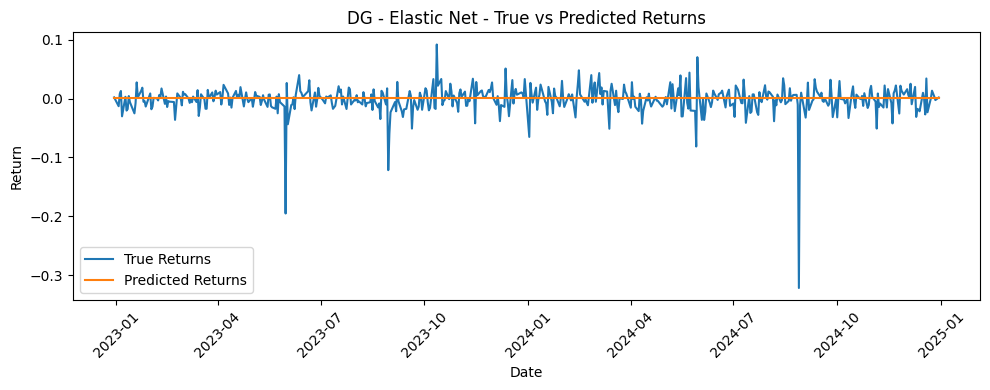


Elastic Net Model Results:
  Ticker      RMSE  Relative RMSE (%)  R_squared  Best Alpha  Best l1_ratio
3   AAPL  0.013543          11.209311  -0.000873    4.328761       0.707071
2     DE  0.015993          11.347374  -0.003152    4.328761       0.707071
1    CAT  0.017194          10.831111  -0.000180    4.328761       0.707071
6     CF  0.018448          12.507169  -0.000507    4.328761       0.707071
7    VLO  0.019525          13.782325  -0.001654    0.001123       0.898990
8    TGT  0.021528           5.496829  -0.000506    4.328761       0.707071
0      F  0.022406           8.672981  -0.000003    0.001123       0.898990
4    WHR  0.023492           7.135030  -0.000025    4.328761       0.707071
9     DG  0.025348           6.136135  -0.012043    4.328761       0.707071
5      X  0.031503           5.805130  -0.000063    0.001123       0.898990


In [12]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

# List of tickers
tickers = ['F', 'CAT', 'DE', 'AAPL', 'WHR', 'X', 'CF', 'VLO', 'TGT', 'DG']


results = []

# Loop over each ticker
for ticker in tickers:
    print(f"Downloading data for {ticker}...")
    df = yf.download(ticker, start='2015-01-01', end='2025-01-01', auto_adjust=True)['Close'].dropna()

    # Feature engineering
    features = pd.DataFrame(index=df.index)
    features['return_1d'] = df.pct_change(1)
    features['return_5d'] = df.pct_change(5)
    features['ma_5'] = df.rolling(window=5).mean()
    features['ma_10'] = df.rolling(window=10).mean()
    features['vol_5d'] = df.pct_change().rolling(window=5).std()
    features = features.dropna()

    # Target variable (next day return)
    y = features['return_1d'].shift(-1).dropna()
    X = features.loc[y.index]  # Align features and target

    # Train/test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

    # Feature scaling
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    # Parameter distributions for RandomizedSearchCV
    param_distributions = {
        'alpha': np.logspace(-3, 2, 100),  # 0.001 to 100 (log scale)
        'l1_ratio': np.linspace(0, 1, 100)  # 0 to 1
    }

    # Base ElasticNet model
    elastic_net = ElasticNet(random_state=42, max_iter=50000)

    # Randomized search
    random_search = RandomizedSearchCV(
        estimator=elastic_net,
        param_distributions=param_distributions,
        n_iter=50,  # number of random parameter sets
        cv=5,
        scoring='r2',
        random_state=42,
        n_jobs=-1,
        verbose=1
    )

    # Fit
    random_search.fit(X_train, y_train)

    # Best model
    elastic_model = random_search.best_estimator_
    best_params = random_search.best_params_

    # Predictions
    y_pred = elastic_model.predict(X_test)

    # Evaluation
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    r2 = r2_score(y_test, y_pred)
    return_range = y_test.max() - y_test.min()
    relative_rmse = rmse / return_range * 100  # %

    # Save results
    results.append({
        'Ticker': ticker,
        'RMSE': rmse,
        'Relative RMSE (%)': relative_rmse,
        'R_squared': r2,
        'Best Alpha': best_params['alpha'],
        'Best l1_ratio': best_params['l1_ratio']
    })

    plt.figure(figsize=(10, 4))
    plt.plot(y_test.index, y_test.values, label='True Returns')
    plt.plot(y_test.index, y_pred, label='Predicted Returns')
    plt.title(f'{ticker} - Elastic Net - True vs Predicted Returns')
    plt.xlabel('Date')
    plt.ylabel('Return')
    plt.legend()
    plt.xticks(rotation=45)  # Rotate dates for better readability
    plt.tight_layout()       # Adjust layout so labels fit
    plt.show()


# Final results
results_elastic = pd.DataFrame(results)
print("\nElastic Net Model Results:")
print(results_elastic.sort_values('RMSE'))


# Random Forest Regression Return

[*********************100%***********************]  1 of 1 completed

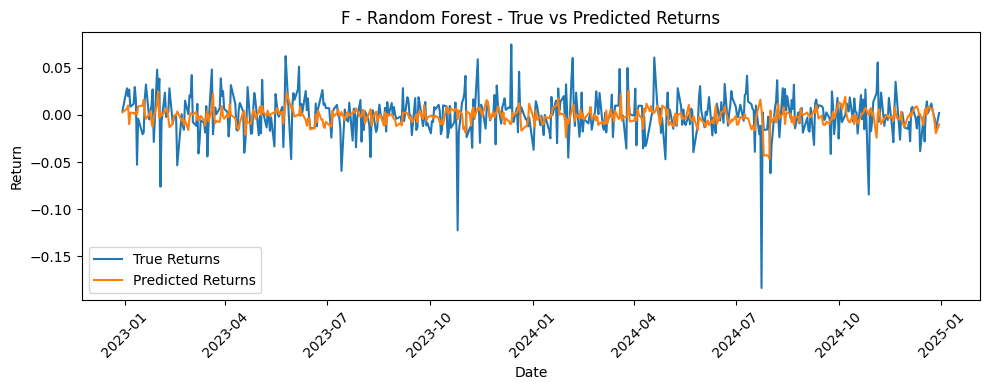

[*********************100%***********************]  1 of 1 completed

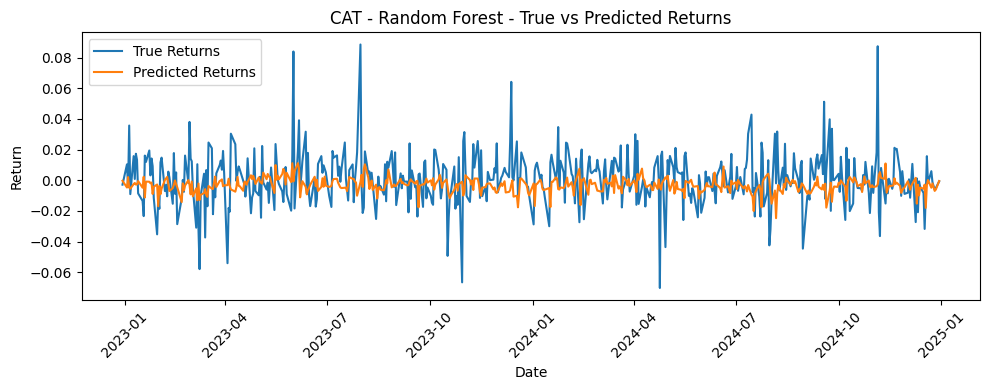

[*********************100%***********************]  1 of 1 completed

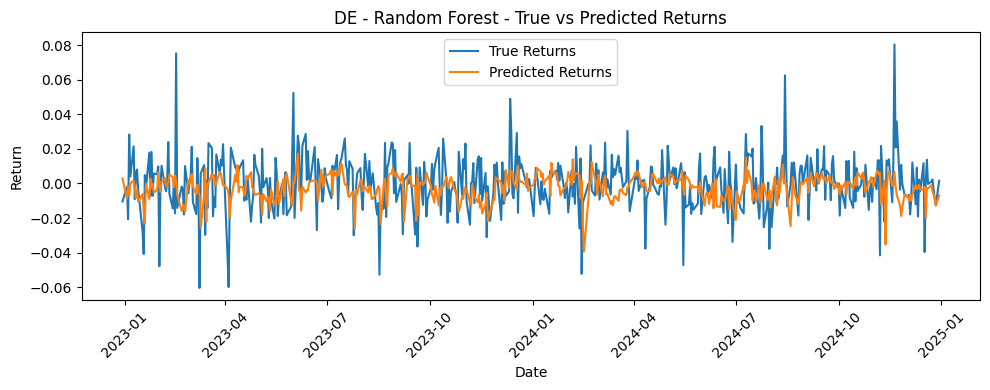

[*********************100%***********************]  1 of 1 completed

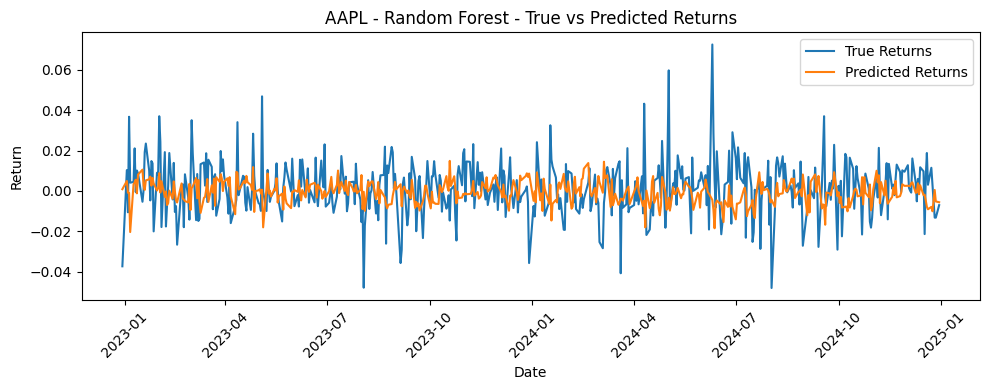

[*********************100%***********************]  1 of 1 completed

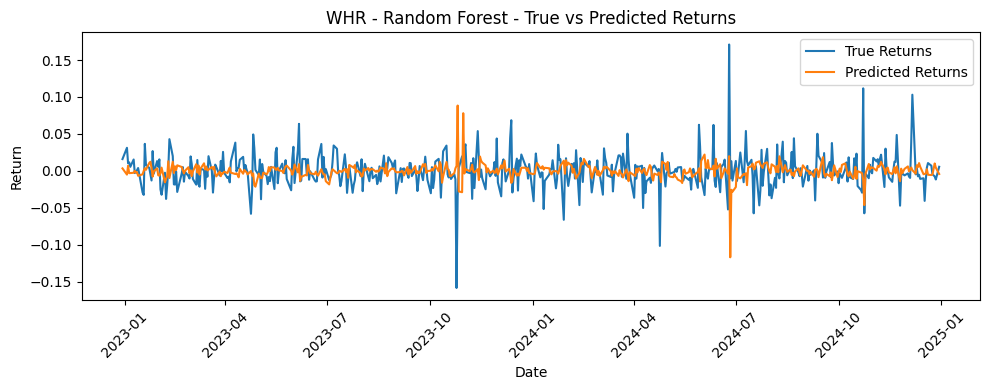

[*********************100%***********************]  1 of 1 completed

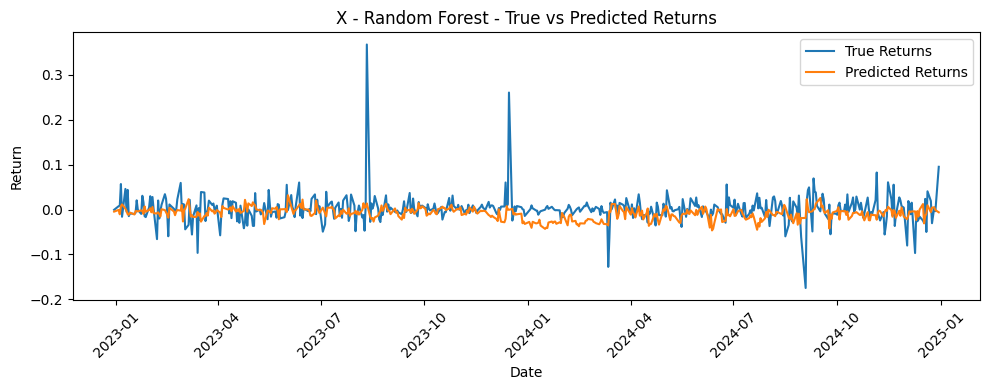

[*********************100%***********************]  1 of 1 completed

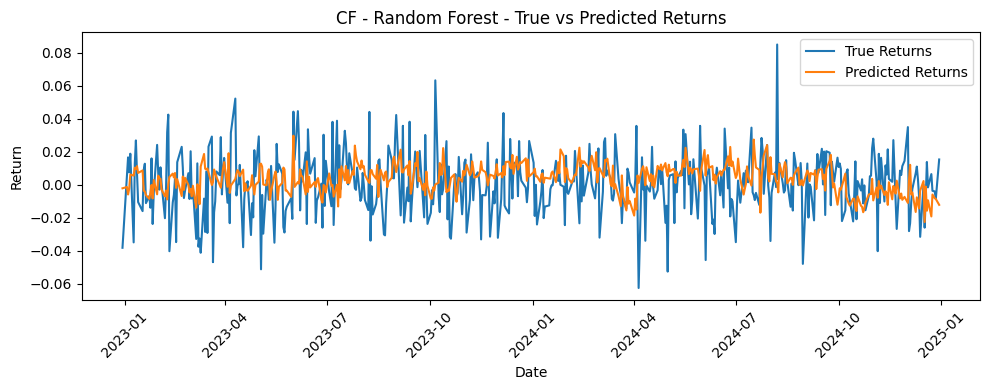

[*********************100%***********************]  1 of 1 completed

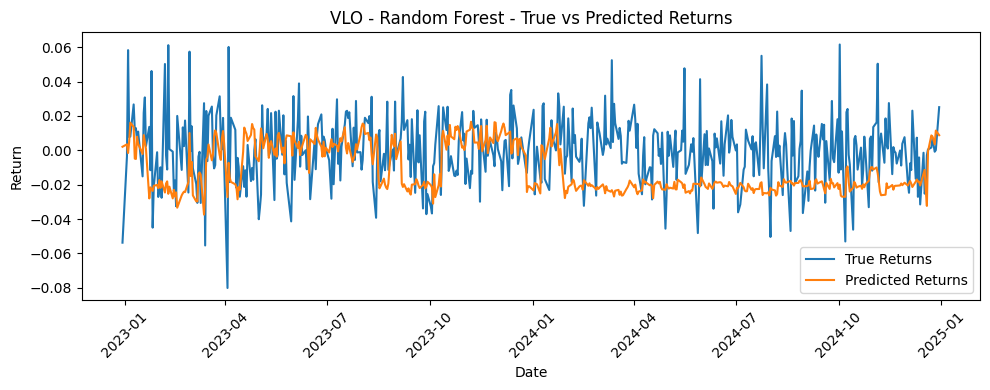

[*********************100%***********************]  1 of 1 completed

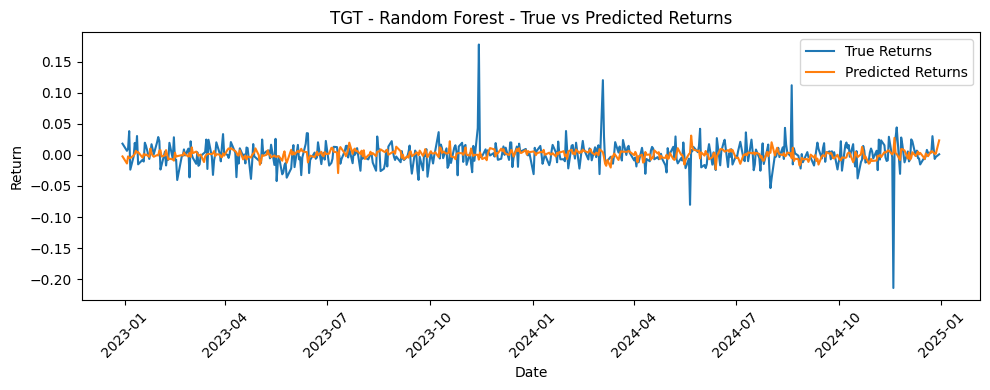

[*********************100%***********************]  1 of 1 completed

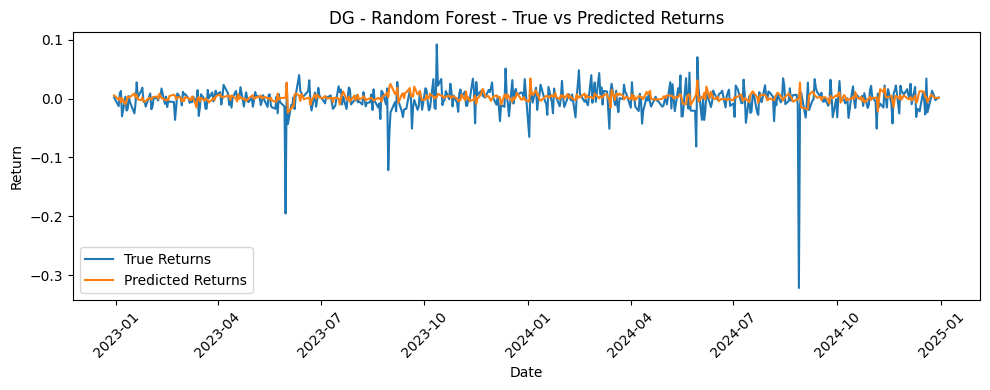


Random Forest Model Results:
  Ticker      RMSE  Relative RMSE (%)  R_squared
3   AAPL  0.014759          12.216467  -0.188810
2     DE  0.017200          12.203958  -0.160319
1    CAT  0.018435          11.612904  -0.149778
6     CF  0.020567          13.943385  -0.243479
8    TGT  0.022724           5.802303  -0.114797
0      F  0.023616           9.141059  -0.110855
7    VLO  0.025344          17.889762  -0.687648
9     DG  0.025828           6.252373  -0.050749
4    WHR  0.026003           7.897899  -0.225300
5      X  0.034068           6.277847  -0.169567


In [13]:
import yfinance as yf
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

tickers = ['F', 'CAT', 'DE', 'AAPL', 'WHR', 'X', 'CF', 'VLO', 'TGT', 'DG']

results = []

# Loop over stocks
for ticker in tickers:
    print(f"Downloading data for {ticker}...")
    df = yf.download(ticker, start='2015-01-01', end='2025-01-01', auto_adjust=True)['Close'].dropna()

    # Feature engineering
    features = pd.DataFrame(index=df.index)
    features['return_1d'] = df.pct_change(1)
    features['return_5d'] = df.pct_change(5)
    features['ma_5'] = df.rolling(window=5).mean()
    features['ma_10'] = df.rolling(window=10).mean()
    features['vol_5d'] = df.pct_change().rolling(window=5).std()
    features = features.dropna()

    y = features['return_1d'].shift(-1).dropna()  # Target = volgende dag return
    X = features.loc[y.index]  # Align features met target

    # Train/test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

    # RandomForestRegressor
    rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
    rf_model.fit(X_train, y_train)

    # Predictie
    y_pred = rf_model.predict(X_test)

    # RMSE
    rmse = mean_squared_error(y_test, y_pred, squared=False)

    # R-squared
    r2 = r2_score(y_test, y_pred)

    # Range van returns (voor relatieve RMSE)
    return_range = y_test.max() - y_test.min()
    relative_rmse = rmse / return_range * 100  # in procenten

    results.append({
        'Ticker': ticker,
        'RMSE': rmse,
        'Relative RMSE (%)': relative_rmse,
        'R_squared': r2
    })

    plt.figure(figsize=(10, 4))
    plt.plot(y_test.index, y_test.values, label='True Returns')
    plt.plot(y_test.index, y_pred, label='Predicted Returns')
    plt.title(f'{ticker} - Random Forest - True vs Predicted Returns')
    plt.xlabel('Date')
    plt.ylabel('Return')
    plt.legend()
    plt.xticks(rotation=45)  # Rotate dates for better readability
    plt.tight_layout()       # Adjust layout so labels fit
    plt.show()

# Results
results_rf = pd.DataFrame(results)
print("\nRandom Forest Model Results:")
print(results_rf.sort_values('RMSE'))


# XGboost (gradient boosting model) Returns

[*********************100%***********************]  1 of 1 completed

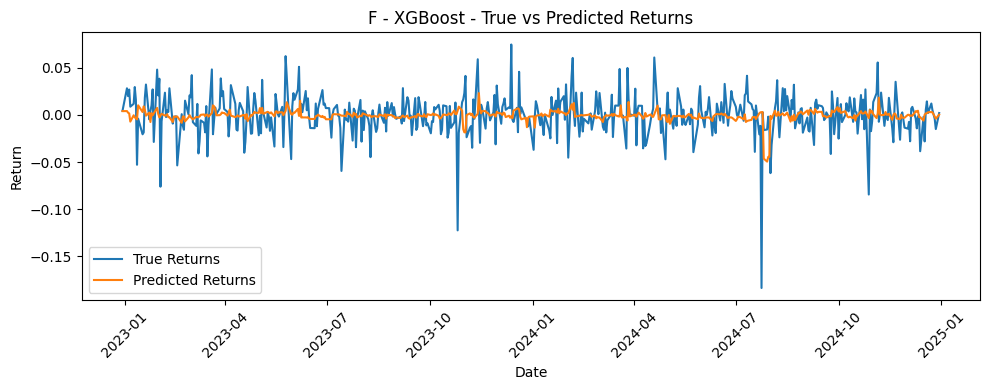

[*********************100%***********************]  1 of 1 completed

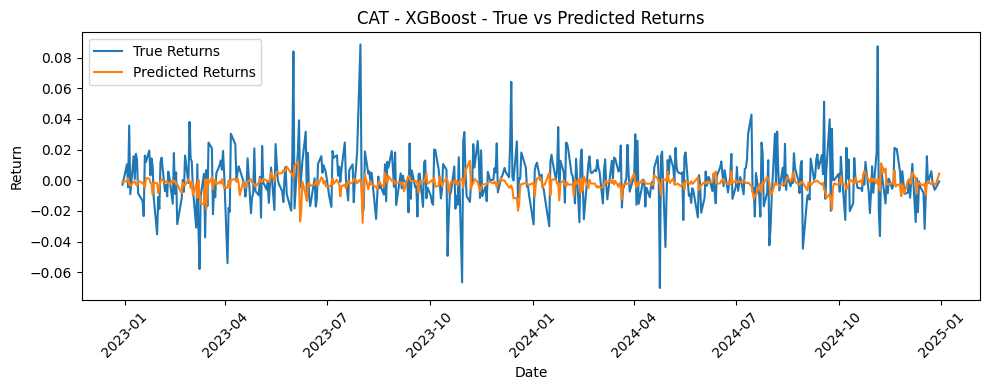

[*********************100%***********************]  1 of 1 completed

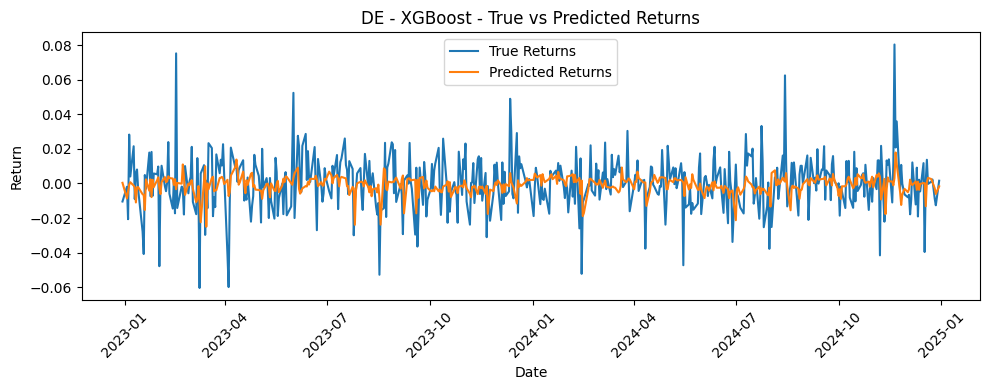

[*********************100%***********************]  1 of 1 completed

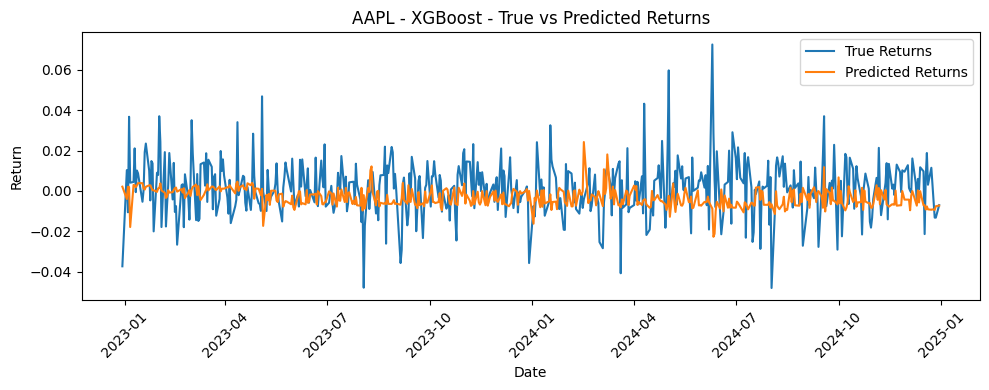

[*********************100%***********************]  1 of 1 completed

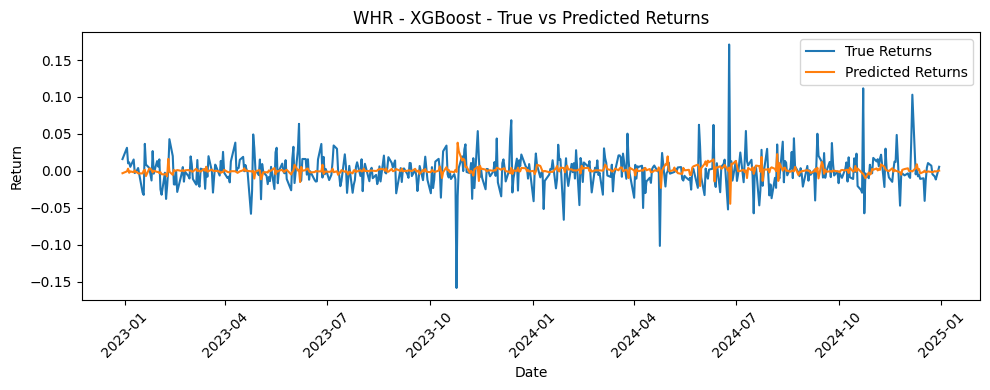

[*********************100%***********************]  1 of 1 completed

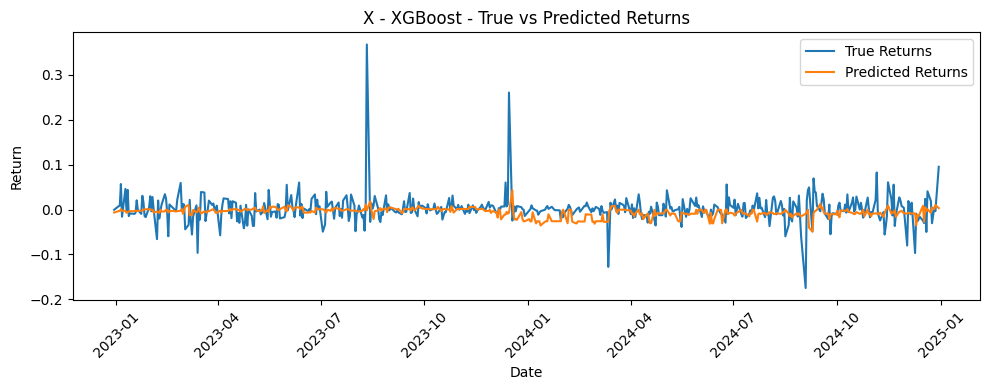

[*********************100%***********************]  1 of 1 completed

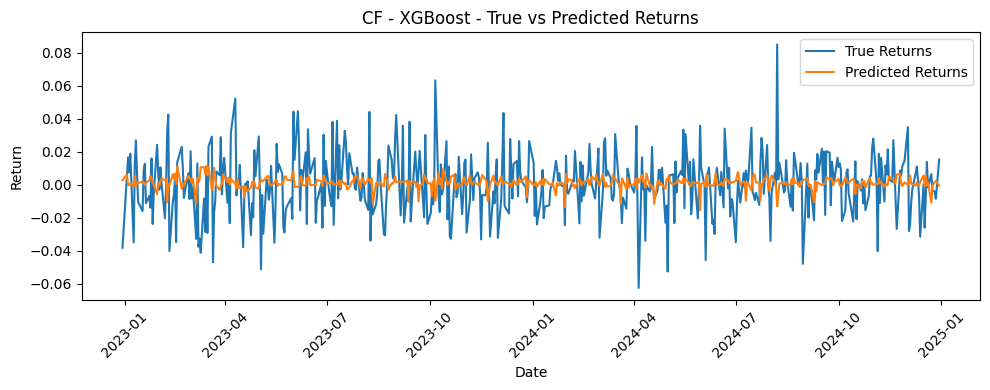

[*********************100%***********************]  1 of 1 completed

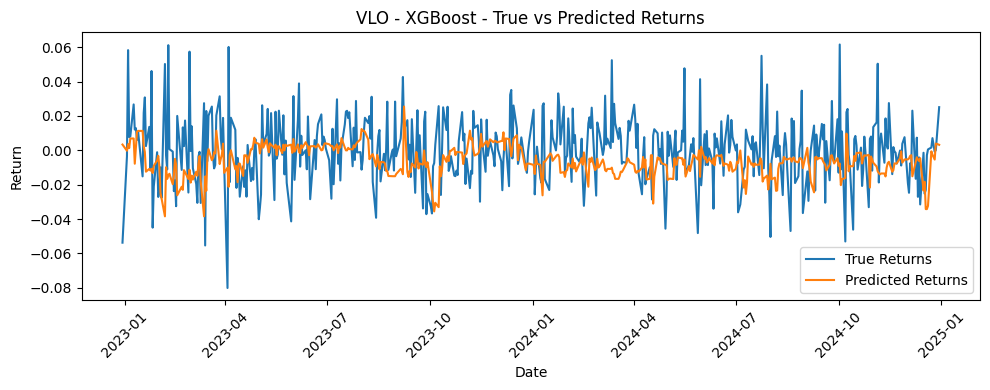

[*********************100%***********************]  1 of 1 completed

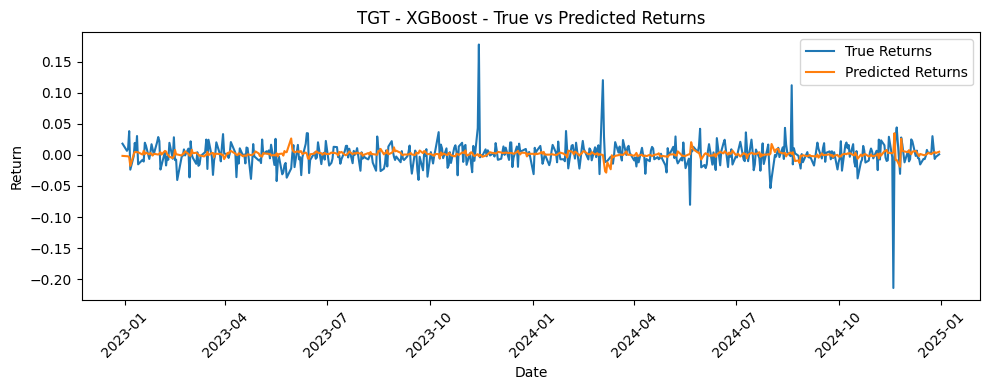

[*********************100%***********************]  1 of 1 completed

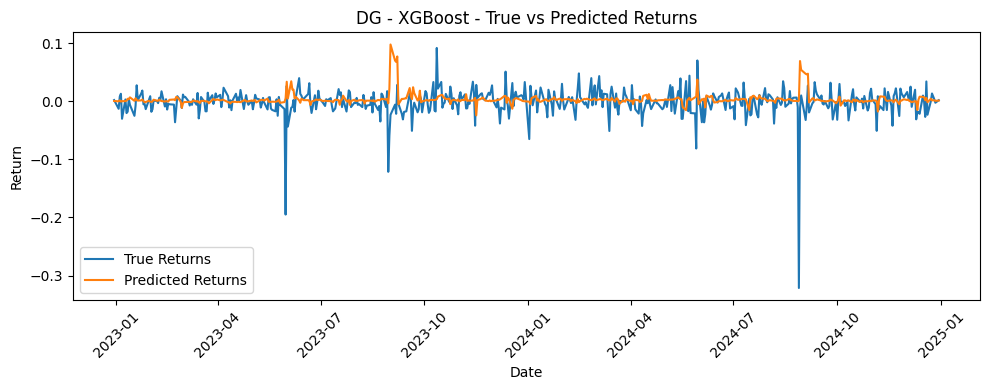


XGBoost Model Results:
  Ticker      RMSE  Relative RMSE (%)  R_squared
3   AAPL  0.014836          12.279985  -0.201204
2     DE  0.016309          11.571746  -0.043214
1    CAT  0.017802          11.213896  -0.072125
6     CF  0.019131          12.969925  -0.075913
7    VLO  0.022110          15.606515  -0.284354
8    TGT  0.022170           5.660828  -0.061097
0      F  0.022809           8.828941  -0.036291
4    WHR  0.023854           7.245248  -0.031159
9     DG  0.027546           6.668370  -0.195222
5      X  0.033200           6.117732  -0.110669


In [14]:
import yfinance as yf
import pandas as pd
import numpy as np
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

tickers = ['F', 'CAT', 'DE', 'AAPL', 'WHR', 'X', 'CF', 'VLO', 'TGT', 'DG']


results = []

# Loop over stocks
for ticker in tickers:
    print(f"Downloading data for {ticker}...")
    df = yf.download(ticker, start='2015-01-01', end='2025-01-01', auto_adjust=True)['Close'].dropna()

    # Feature engineering
    features = pd.DataFrame(index=df.index)
    features['return_1d'] = df.pct_change(1)
    features['return_5d'] = df.pct_change(5)
    features['ma_5'] = df.rolling(window=5).mean()
    features['ma_10'] = df.rolling(window=10).mean()
    features['vol_5d'] = df.pct_change().rolling(window=5).std()
    features = features.dropna()

    y = features['return_1d'].shift(-1).dropna()  # Target = volgende dag return
    X = features.loc[y.index]  # Align features met target

    # Train/test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

    # XGBoost Regressor
    XG_model = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
    XG_model.fit(X_train, y_train)

    # Predictie
    y_pred = XG_model.predict(X_test)

    # RMSE
    rmse = mean_squared_error(y_test, y_pred, squared=False)

    # R-squared
    r2 = r2_score(y_test, y_pred)

    # Range van returns (voor relatieve RMSE)
    return_range = y_test.max() - y_test.min()
    relative_rmse = rmse / return_range * 100  # in procenten

    results.append({
        'Ticker': ticker,
        'RMSE': rmse,
        'Relative RMSE (%)': relative_rmse,
        'R_squared': r2
    })

    plt.figure(figsize=(10, 4))
    plt.plot(y_test.index, y_test.values, label='True Returns')
    plt.plot(y_test.index, y_pred, label='Predicted Returns')
    plt.title(f'{ticker} - XGBoost - True vs Predicted Returns')
    plt.xlabel('Date')
    plt.ylabel('Return')
    plt.legend()
    plt.xticks(rotation=45)  # Rotate dates for better readability
    plt.tight_layout()       # Adjust layout so labels fit
    plt.show()


# Results
results_XG = pd.DataFrame(results)
print("\nXGBoost Model Results:")
print(results_XG.sort_values('RMSE'))


# lightGBM (gradient boosting model) Returns

[*********************100%***********************]  1 of 1 completed

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000082 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1275
[LightGBM] [Info] Number of data points in the train set: 2004, number of used features: 5
[LightGBM] [Info] Start training from score 0.000307
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

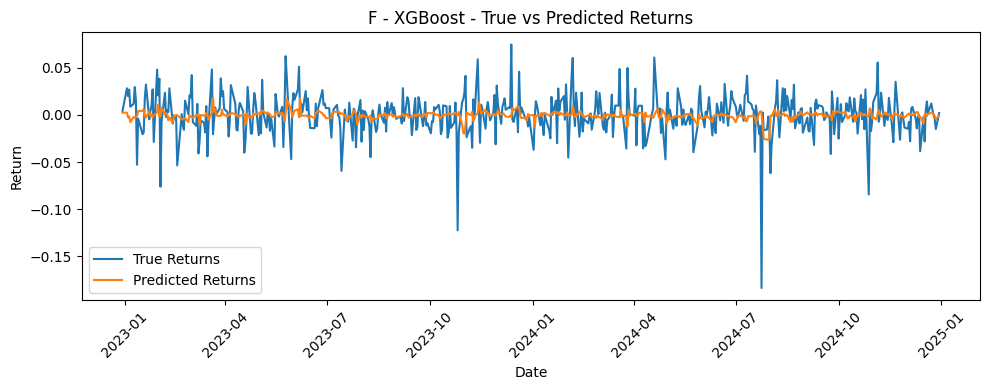

[*********************100%***********************]  1 of 1 completed

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000079 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1275
[LightGBM] [Info] Number of data points in the train set: 2004, number of used features: 5
[LightGBM] [Info] Start training from score 0.000815
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

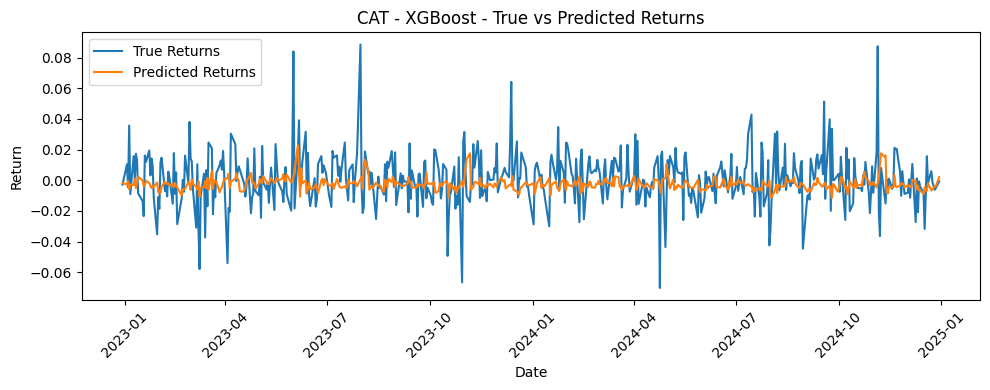

[*********************100%***********************]  1 of 1 completed

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000057 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1275
[LightGBM] [Info] Number of data points in the train set: 2004, number of used features: 5
[LightGBM] [Info] Start training from score 0.001057
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

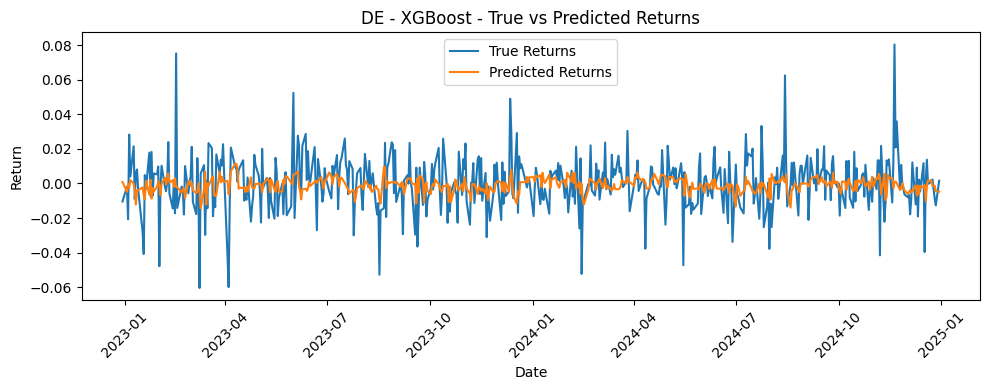

[*********************100%***********************]  1 of 1 completed

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000077 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1275
[LightGBM] [Info] Number of data points in the train set: 2004, number of used features: 5
[LightGBM] [Info] Start training from score 0.001020
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

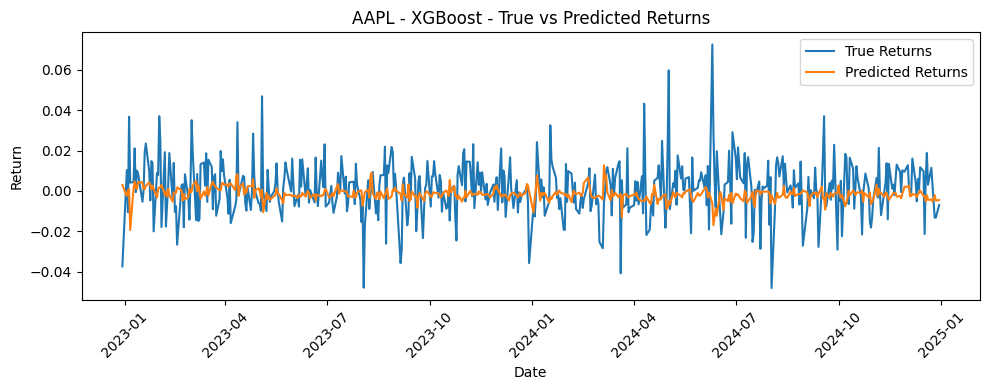

[*********************100%***********************]  1 of 1 completed

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000066 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1275
[LightGBM] [Info] Number of data points in the train set: 2004, number of used features: 5
[LightGBM] [Info] Start training from score 0.000214
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

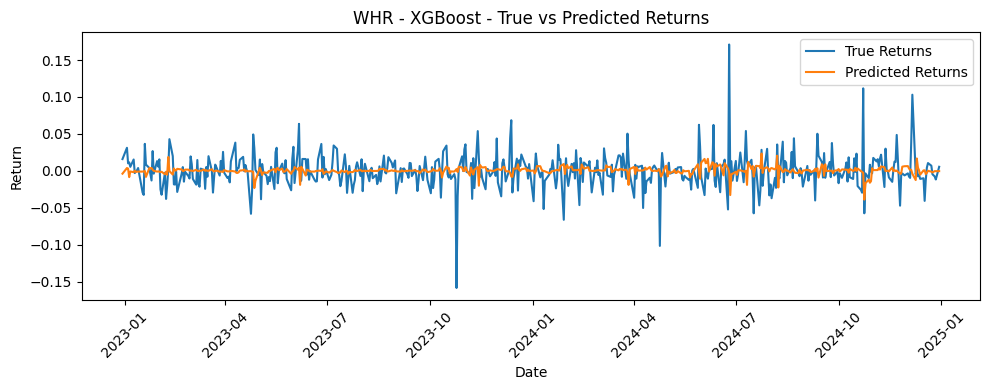

[*********************100%***********************]  1 of 1 completed

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000034 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1275
[LightGBM] [Info] Number of data points in the train set: 2004, number of used features: 5
[LightGBM] [Info] Start training from score 0.000918
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -

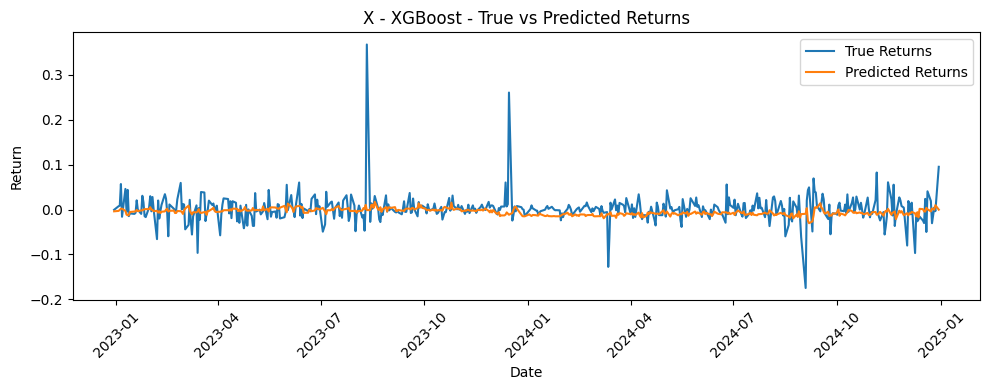

[*********************100%***********************]  1 of 1 completed

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000075 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1275
[LightGBM] [Info] Number of data points in the train set: 2004, number of used features: 5
[LightGBM] [Info] Start training from score 0.000680
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

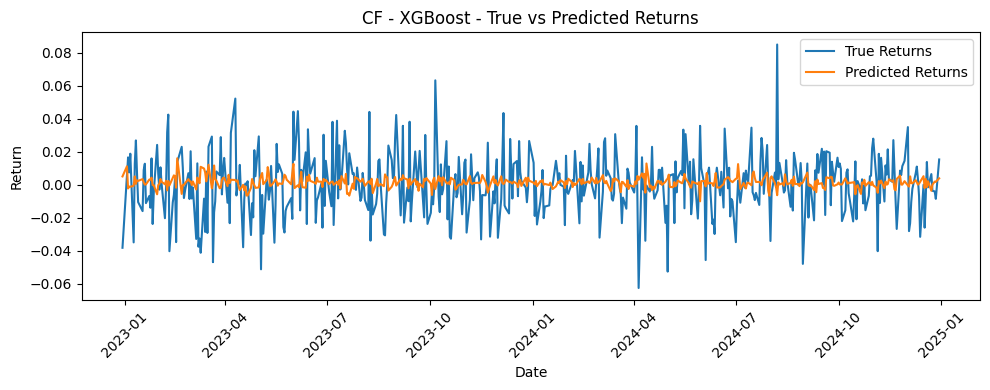

[*********************100%***********************]  1 of 1 completed

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000077 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1275
[LightGBM] [Info] Number of data points in the train set: 2004, number of used features: 5
[LightGBM] [Info] Start training from score 0.001038
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

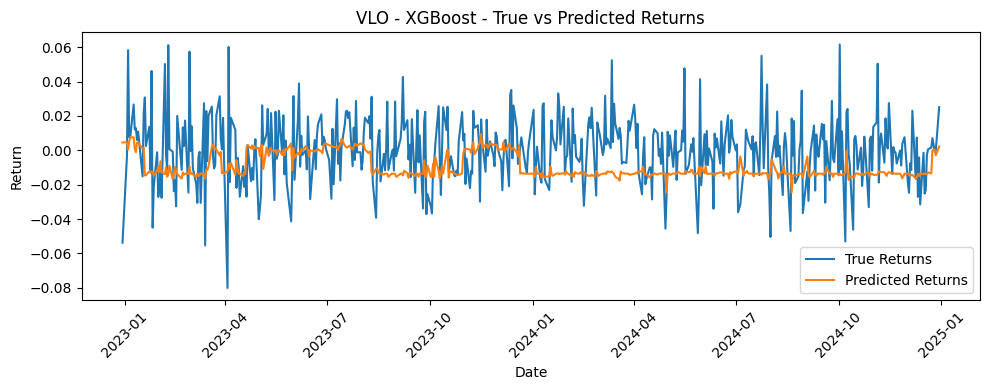

[*********************100%***********************]  1 of 1 completed

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000064 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1275
[LightGBM] [Info] Number of data points in the train set: 2004, number of used features: 5
[LightGBM] [Info] Start training from score 0.000646
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

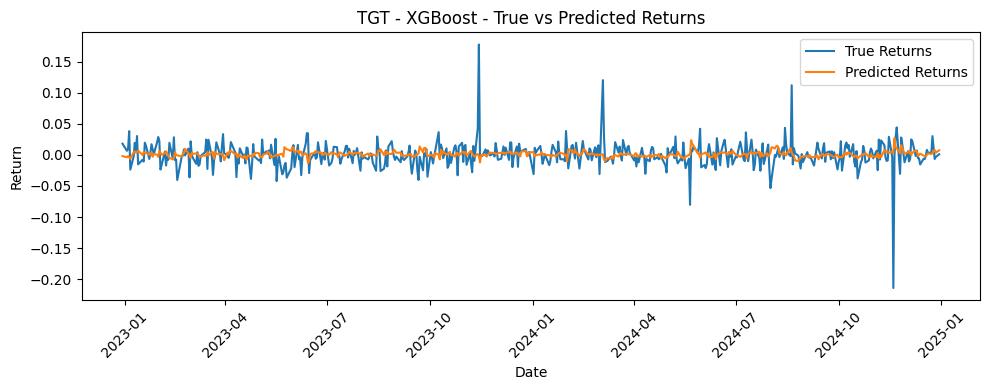

[*********************100%***********************]  1 of 1 completed

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000101 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1275
[LightGBM] [Info] Number of data points in the train set: 2004, number of used features: 5
[LightGBM] [Info] Start training from score 0.000837
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

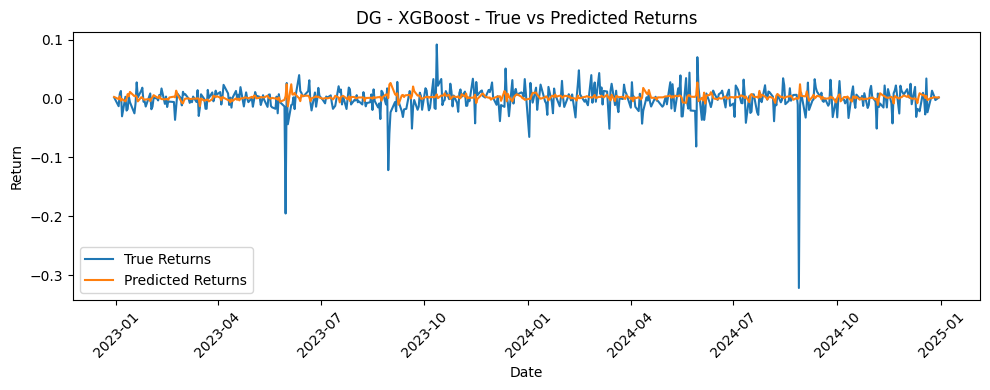


LightGBM Model Results:
  Ticker      RMSE  Relative RMSE (%)  R_squared
3   AAPL  0.014261          11.803513  -0.109798
2     DE  0.016268          11.542832  -0.038008
1    CAT  0.018019          11.350425  -0.098390
6     CF  0.018917          12.825165  -0.052030
8    TGT  0.022015           5.621111  -0.046260
7    VLO  0.022323          15.757503  -0.309326
0      F  0.022740           8.802092  -0.029998
4    WHR  0.024143           7.332872  -0.056252
9     DG  0.025910           6.272200  -0.057424
5      X  0.032509           5.990454  -0.064935


In [15]:
import yfinance as yf
import pandas as pd
import numpy as np
import lightgbm as lgb
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

tickers = ['F', 'CAT', 'DE', 'AAPL', 'WHR', 'X', 'CF', 'VLO', 'TGT', 'DG']


results = []

# Loop over stocks
for ticker in tickers:
    print(f"Downloading data for {ticker}...")
    df = yf.download(ticker, start='2015-01-01', end='2025-01-01', auto_adjust=True)['Close'].dropna()

    # Feature engineering
    features = pd.DataFrame(index=df.index)
    features['return_1d'] = df.pct_change(1)
    features['return_5d'] = df.pct_change(5)
    features['ma_5'] = df.rolling(window=5).mean()
    features['ma_10'] = df.rolling(window=10).mean()
    features['vol_5d'] = df.pct_change().rolling(window=5).std()
    features = features.dropna()

    y = features['return_1d'].shift(-1).dropna()  # Target = volgende dag return
    X = features.loc[y.index]  # Align features met target

    # Train/test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

    # LightGBM Regressor
    light_model = lgb.LGBMRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
    light_model.fit(X_train, y_train)

    # Predictie
    y_pred = light_model.predict(X_test)

    # RMSE
    rmse = mean_squared_error(y_test, y_pred, squared=False)

    # R-squared
    r2 = r2_score(y_test, y_pred)

    # Range van returns (voor relatieve RMSE)
    return_range = y_test.max() - y_test.min()
    relative_rmse = rmse / return_range * 100  # in procenten

    results.append({
        'Ticker': ticker,
        'RMSE': rmse,
        'Relative RMSE (%)': relative_rmse,
        'R_squared': r2
    })

    plt.figure(figsize=(10, 4))
    plt.plot(y_test.index, y_test.values, label='True Returns')
    plt.plot(y_test.index, y_pred, label='Predicted Returns')
    plt.title(f'{ticker} - XGBoost - True vs Predicted Returns')
    plt.xlabel('Date')
    plt.ylabel('Return')
    plt.legend()
    plt.xticks(rotation=45)  # Rotate dates for better readability
    plt.tight_layout()       # Adjust layout so labels fit
    plt.show()

# Results
results_light = pd.DataFrame(results)
print("\nLightGBM Model Results:")
print(results_light.sort_values('RMSE'))


# Testen welke machine learning model het beste is!!!

### Likelihood ratio test:
p-waarde onder de 0.05 betekent dat het tweede model significant beter is dan de eerste.

p-waarde boven de 0.05 betekent dat er geen bewijs is dat het tweede model beter is dan de eerste.

### Algemene ranking op basis van likelihood ratio test

1	LightGBM 

2	XGBoost	

3	Random Forest	

4	Elastic Net

In [26]:
import numpy as np
from scipy.stats import chi2

# Define the tickers
tickers = ['F', 'CAT', 'DE', 'AAPL', 'WHR', 'X', 'CF', 'VLO', 'TGT', 'DG']

# Extract RMSE values into dictionaries automatically
rmse_elastic = dict(results_elastic[results_elastic['Ticker'].isin(tickers)].set_index('Ticker')['RMSE'])
rmse_rf = dict(results_rf[results_rf['Ticker'].isin(tickers)].set_index('Ticker')['RMSE'])
rmse_xgb = dict(results_XG[results_XG['Ticker'].isin(tickers)].set_index('Ticker')['RMSE'])
rmse_lgb = dict(results_light[results_light['Ticker'].isin(tickers)].set_index('Ticker')['RMSE'])


# Aantal observaties in test set
n = int(0.2 * 252 * 10)  # ongeveer 20% van 6 jaar data

# Functie om likelihood ratio en p-value te berekenen
def likelihood_ratio_test(rmse1, rmse2):
    var1 = rmse1**2
    var2 = rmse2**2

    logL1 = -n/2 * np.log(2 * np.pi * var1) - n/2
    logL2 = -n/2 * np.log(2 * np.pi * var2) - n/2

    LR_stat = -2 * (logL1 - logL2)
    p_value = chi2.sf(LR_stat, df=1)
    return LR_stat, p_value

# Print alle combinaties
print("\nLikelihood Ratio Tests (including LightGBM):")
for ticker in tickers:
    print(f"\n{ticker}:")

    # Elastic Net vs Random Forest
    LR_er, p_er = likelihood_ratio_test(rmse_elastic[ticker], rmse_rf[ticker])
    print(f"Elastic Net vs Random Forest: LR = {LR_er:.4f}, p = {p_er:.6f}")
    
    # Elastic Net vs XGBoost
    LR_ex, p_ex = likelihood_ratio_test(rmse_elastic[ticker], rmse_xgb[ticker])
    print(f"Elastic Net vs XGBoost: LR = {LR_ex:.4f}, p = {p_ex:.6f}")

    # Elastic Net vs LightGBM
    LR_elgb, p_elgb = likelihood_ratio_test(rmse_elastic[ticker], rmse_lgb[ticker])
    print(f"Elastic Net vs LightGBM: LR = {LR_elgb:.4f}, p = {p_elgb:.6f}")
    
    # Random Forest vs XGBoost
    LR_rx, p_rx = likelihood_ratio_test(rmse_rf[ticker], rmse_xgb[ticker])
    print(f"Random Forest vs XGBoost: LR = {LR_rx:.4f}, p = {p_rx:.6f}")
    
    # Random Forest vs LightGBM
    LR_rlgb, p_rlgb = likelihood_ratio_test(rmse_rf[ticker], rmse_lgb[ticker])
    print(f"Random Forest vs LightGBM: LR = {LR_rlgb:.4f}, p = {p_rlgb:.6f}")
    
    # XGBoost vs LightGBM
    LR_xlgb, p_xlgb = likelihood_ratio_test(rmse_xgb[ticker], rmse_lgb[ticker])
    print(f"XGBoost vs LightGBM: LR = {LR_xlgb:.4f}, p = {p_xlgb:.6f}")



Likelihood Ratio Tests (including LightGBM):

F:
Elastic Net vs Random Forest: LR = -52.9842, p = 1.000000
Elastic Net vs XGBoost: LR = -17.9651, p = 1.000000
Elastic Net vs LightGBM: LR = -14.8951, p = 1.000000
Random Forest vs XGBoost: LR = 35.0191, p = 0.000000
Random Forest vs LightGBM: LR = 38.0891, p = 0.000000
XGBoost vs LightGBM: LR = 3.0700, p = 0.079748

CAT:
Elastic Net vs Random Forest: LR = -70.2517, p = 1.000000
Elastic Net vs XGBoost: LR = -35.0089, p = 1.000000
Elastic Net vs LightGBM: LR = -47.2072, p = 1.000000
Random Forest vs XGBoost: LR = 35.2428, p = 0.000000
Random Forest vs LightGBM: LR = 23.0445, p = 0.000002
XGBoost vs LightGBM: LR = -12.1983, p = 1.000000

DE:
Elastic Net vs Random Forest: LR = -73.3562, p = 1.000000
Elastic Net vs XGBoost: LR = -19.7367, p = 1.000000
Elastic Net vs LightGBM: LR = -17.2150, p = 1.000000
Random Forest vs XGBoost: LR = 53.6195, p = 0.000000
Random Forest vs LightGBM: LR = 56.1412, p = 0.000000
XGBoost vs LightGBM: LR = 2.5218,

### Op basis van grafieken

Elastic Net:

Vaak de laagste RMSE op bepaalde tickers (bv. F, DE, AAPL).

Maar de R² is slecht, soms zelfs negatief of bijna nul.

➔ Elastic Net onderfit (te simpel model, mist de patronen).

Random Forest:

Overal hoger RMSE en slechte R² (sterk negatief).

Vooral op tickers zoals VLO, CF, WHR dramatisch slecht.

➔ Random Forest overfit soms, slechte generalisatie.

XGBoost:

Goede balans: lage RMSE, relatief lage Relative RMSE, en R² meestal beter dan Random Forest.

Niet altijd de beste, maar constant goed.

LightGBM:

Vaak de laagste of bijna laagste RMSE.

Vaak de beste R² (minder negatief of bijna neutraal).

Relative RMSE (%) ook stabiel laag.



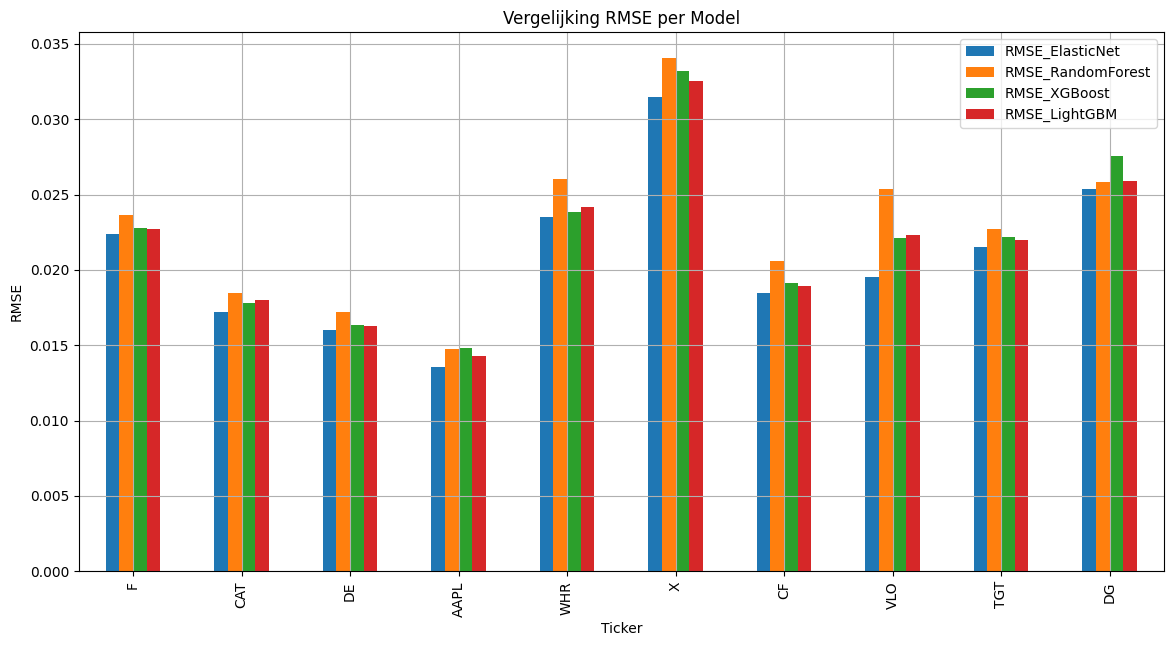

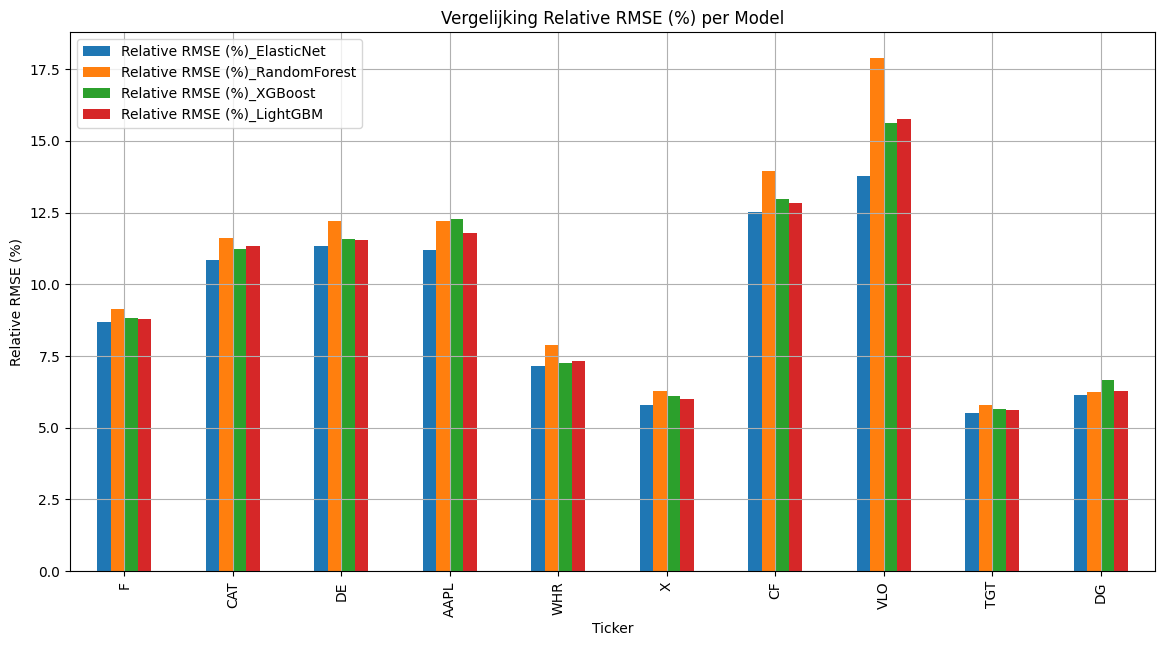

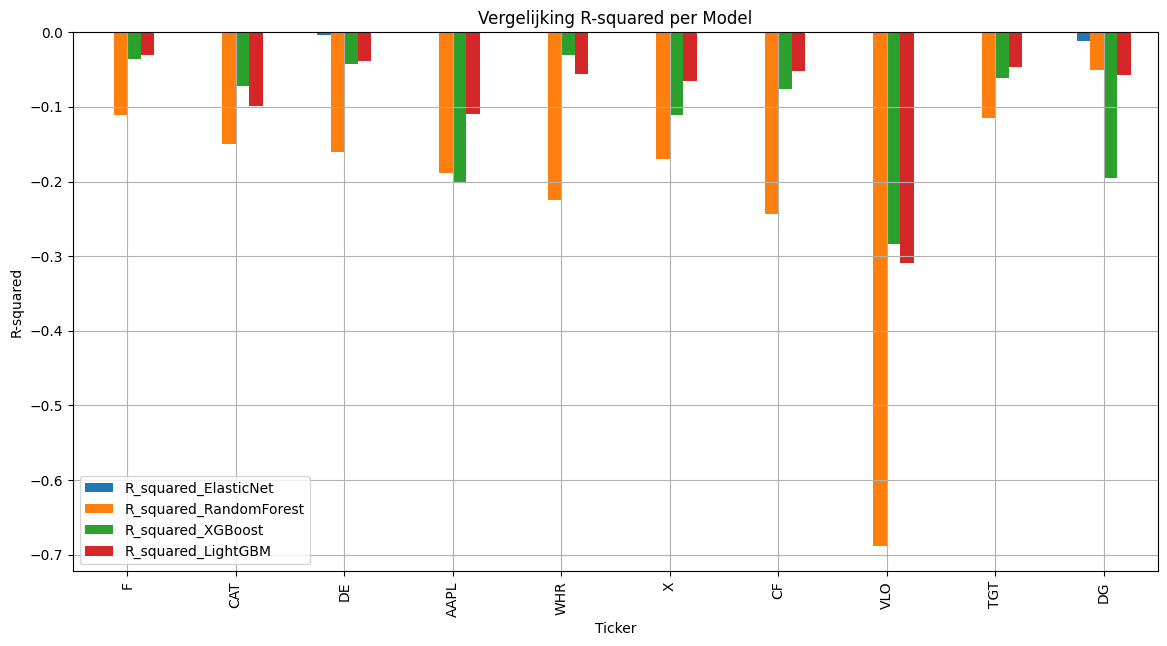


Vergelijking Elastic Net vs Random Forest vs XGBoost vs LightGBM:
  Ticker  RMSE_ElasticNet  Relative RMSE (%)_ElasticNet  R_squared_ElasticNet  \
0      F         0.022406                      8.672981             -0.000003   
1    CAT         0.017194                     10.831111             -0.000180   
2     DE         0.015993                     11.347374             -0.003152   
3   AAPL         0.013543                     11.209311             -0.000873   
4    WHR         0.023492                      7.135030             -0.000025   
5      X         0.031503                      5.805130             -0.000063   
6     CF         0.018448                     12.507169             -0.000507   
7    VLO         0.019525                     13.782325             -0.001654   
8    TGT         0.021528                      5.496829             -0.000506   
9     DG         0.025348                      6.136135             -0.012043   

   Best Alpha  Best l1_ratio  RMSE_Random

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Select the tickers you are interested in
# Define the tickers
tickers = ['F', 'CAT', 'DE', 'AAPL', 'WHR', 'X', 'CF', 'VLO', 'TGT', 'DG']

# Step 2: Filter each model's results for these tickers

# Elastic Net results
results_elastic_net = results_elastic[results_elastic['Ticker'].isin(tickers)].reset_index(drop=True)

# Random Forest results
results_random_forest = results_rf[results_rf['Ticker'].isin(tickers)].reset_index(drop=True)

# XGBoost results
results_xgboost = results_XG[results_XG['Ticker'].isin(tickers)].reset_index(drop=True)

# LightGBM results
results_lightgbm = results_light[results_light['Ticker'].isin(tickers)].reset_index(drop=True)


# Zet alles in dataframes
df_elastic = pd.DataFrame(results_elastic_net)
df_rf = pd.DataFrame(results_random_forest)
df_xgb = pd.DataFrame(results_xgboost)
df_lgb = pd.DataFrame(results_lightgbm)

# Merge op Ticker
comparison = df_elastic.merge(df_rf, on='Ticker', suffixes=('_ElasticNet', '_RandomForest'))
comparison = comparison.merge(df_xgb, on='Ticker')
comparison = comparison.rename(columns={
    'RMSE': 'RMSE_XGBoost',
    'Relative RMSE (%)': 'Relative RMSE (%)_XGBoost',
    'R_squared': 'R_squared_XGBoost'
})
comparison = comparison.merge(df_lgb, on='Ticker')
comparison = comparison.rename(columns={
    'RMSE': 'RMSE_LightGBM',
    'Relative RMSE (%)': 'Relative RMSE (%)_LightGBM',
    'R_squared': 'R_squared_LightGBM'
})

# ------------------
# Barplots
# ------------------

# RMSE Vergelijking
comparison.plot(x='Ticker', y=['RMSE_ElasticNet', 'RMSE_RandomForest', 'RMSE_XGBoost', 'RMSE_LightGBM'], kind='bar', figsize=(14,7))
plt.title('Vergelijking RMSE per Model')
plt.ylabel('RMSE')
plt.grid(True)
plt.show()

# Relative RMSE Vergelijking
comparison.plot(x='Ticker', y=['Relative RMSE (%)_ElasticNet', 'Relative RMSE (%)_RandomForest', 'Relative RMSE (%)_XGBoost', 'Relative RMSE (%)_LightGBM'], kind='bar', figsize=(14,7))
plt.title('Vergelijking Relative RMSE (%) per Model')
plt.ylabel('Relative RMSE (%)')
plt.grid(True)
plt.show()

# R-squared Vergelijking
comparison.plot(x='Ticker', y=['R_squared_ElasticNet', 'R_squared_RandomForest', 'R_squared_XGBoost', 'R_squared_LightGBM'], kind='bar', figsize=(14,7))
plt.title('Vergelijking R-squared per Model')
plt.ylabel('R-squared')
plt.grid(True)
plt.show()

# ------------------
# Print comparison table
# ------------------
print("\nVergelijking Elastic Net vs Random Forest vs XGBoost vs LightGBM:")
print(comparison)


# Kijken naar overfitting en onderfitting


### resultaten:

LightGBM - Mild/controlled overfitting

XGBoost	- Moderate overfitting

Random Forest - Worst overfitting

Elastic Net	- Underfitting (too simple, not overfitting)

Training RMSE: 0.0165
Test RMSE: 0.0253
Training R²: 0.0000
Test R²: -0.0120
Potential overfitting: Training RMSE is lower than Test RMSE.
Cross-Validation RMSE: 0.0165 ± 0.0014


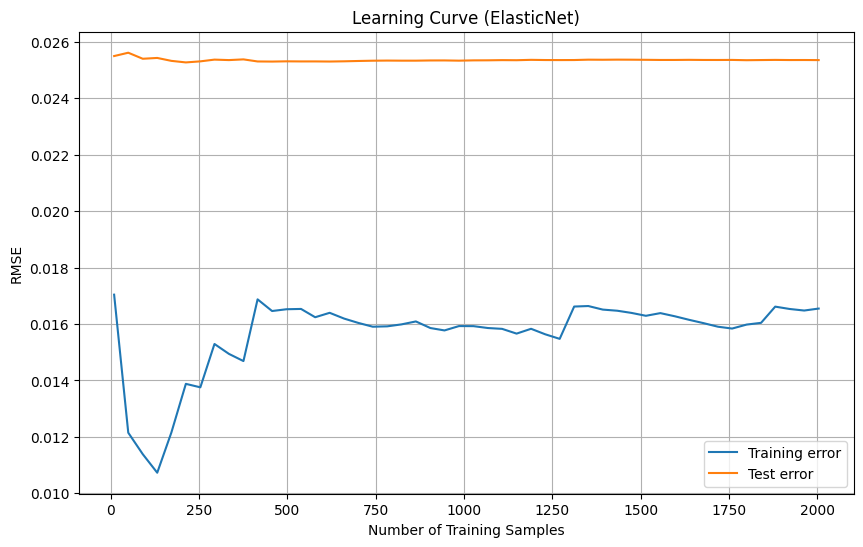


Tuning alpha regularization:
Alpha: 0.001 -> Test RMSE: 0.0253
Alpha: 0.01 -> Test RMSE: 0.0253
Alpha: 0.1 -> Test RMSE: 0.0253
Alpha: 1.0 -> Test RMSE: 0.0253
Alpha: 10.0 -> Test RMSE: 0.0253


In [22]:
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
from sklearn.linear_model import ElasticNet

# Function to check for overfitting for ElasticNet
def check_overfitting_elasticnet(model, X_train, y_train, X_test, y_test, cv=5):
    # 1. Check Training vs Test Performance
    model.fit(X_train, y_train)
    
    # Predict
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Metrics
    train_rmse = mean_squared_error(y_train, y_train_pred, squared=False)
    test_rmse = mean_squared_error(y_test, y_test_pred, squared=False)
    
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)
    
    print(f"Training RMSE: {train_rmse:.4f}")
    print(f"Test RMSE: {test_rmse:.4f}")
    print(f"Training R²: {train_r2:.4f}")
    print(f"Test R²: {test_r2:.4f}")
    
    if train_rmse < test_rmse:
        print("Potential overfitting: Training RMSE is lower than Test RMSE.")
    else:
        print("Model seems to generalize well between training and test sets.")
    
    # 2. Cross-validation performance
    cv_scores = cross_val_score(model, X_train, y_train, cv=cv, scoring='neg_mean_squared_error')
    cv_rmse = np.sqrt(-cv_scores)
    print(f"Cross-Validation RMSE: {cv_rmse.mean():.4f} ± {cv_rmse.std():.4f}")
    
    # 3. Learning curves
    train_errors, test_errors = [], []
    sample_points = np.linspace(10, len(X_train), 50, dtype=int)
    for m in sample_points:
        temp_model = ElasticNet(alpha=model.alpha, l1_ratio=model.l1_ratio, random_state=42, max_iter=50000)
        temp_model.fit(X_train[:m], y_train[:m])
        train_errors.append(mean_squared_error(y_train[:m], temp_model.predict(X_train[:m]), squared=False))
        test_errors.append(mean_squared_error(y_test, temp_model.predict(X_test), squared=False))
    
    plt.figure(figsize=(10, 6))
    plt.plot(sample_points, train_errors, label="Training error")
    plt.plot(sample_points, test_errors, label="Test error")
    plt.title("Learning Curve (ElasticNet)")
    plt.xlabel("Number of Training Samples")
    plt.ylabel("RMSE")
    plt.legend()
    plt.grid(True)
    plt.show()
    
    # 4. Try Regularization
    print("\nTuning alpha regularization:")
    for alpha in [0.001, 0.01, 0.1, 1.0, 10.0]:
        temp_model = ElasticNet(alpha=alpha, l1_ratio=model.l1_ratio, random_state=42, max_iter=50000)
        temp_model.fit(X_train, y_train)
        y_test_pred = temp_model.predict(X_test)
        test_rmse = mean_squared_error(y_test, y_test_pred, squared=False)
        print(f"Alpha: {alpha} -> Test RMSE: {test_rmse:.4f}")

# Example usage:
check_overfitting_elasticnet(elastic_model, X_train, y_train, X_test, y_test)


Training RMSE: 0.0064
Test RMSE: 0.0258
Training R²: 0.8486
Test R²: -0.0507
Potential overfitting: Training RMSE is lower than Test RMSE.
Cross-Validation RMSE: 0.0178 ± 0.0019


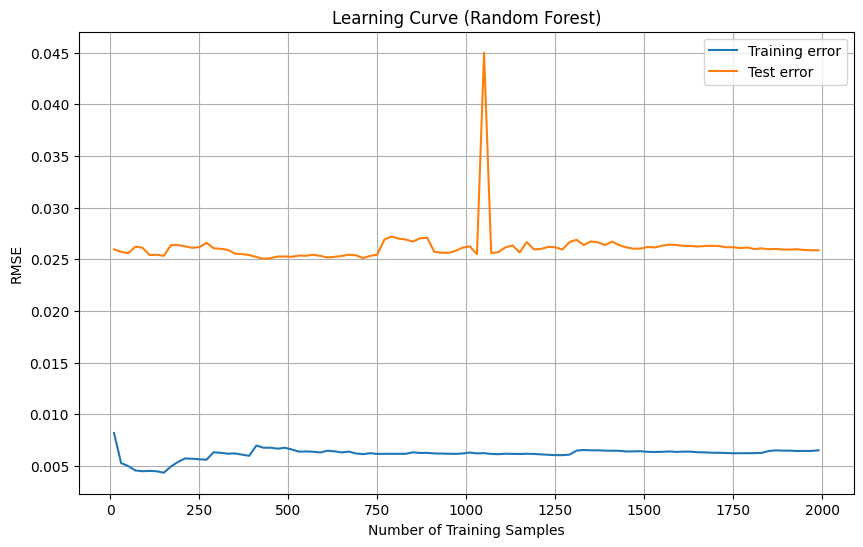


Tuning max_depth parameter:
Max Depth: 3 -> Test RMSE: 0.0254
Max Depth: 5 -> Test RMSE: 0.0254
Max Depth: 7 -> Test RMSE: 0.0255
Max Depth: 10 -> Test RMSE: 0.0255
Max Depth: None -> Test RMSE: 0.0258


In [23]:
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Function to check for overfitting (Random Forest version)
def check_overfitting_rf(model, X_train, y_train, X_test, y_test, cv=5):
    # 1. Check Training vs Test Performance
    model.fit(X_train, y_train)
    
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    train_rmse = mean_squared_error(y_train, y_train_pred, squared=False)
    test_rmse = mean_squared_error(y_test, y_test_pred, squared=False)
    
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)
    
    print(f"Training RMSE: {train_rmse:.4f}")
    print(f"Test RMSE: {test_rmse:.4f}")
    print(f"Training R²: {train_r2:.4f}")
    print(f"Test R²: {test_r2:.4f}")
    
    if train_rmse < test_rmse:
        print("Potential overfitting: Training RMSE is lower than Test RMSE.")
    else:
        print("Model seems to generalize well between training and test sets.")
    
    # 2. Check Cross-validation Performance
    cv_scores = cross_val_score(model, X_train, y_train, cv=cv, scoring='neg_mean_squared_error')
    cv_rmse = np.sqrt(-cv_scores)
    print(f"Cross-Validation RMSE: {cv_rmse.mean():.4f} ± {cv_rmse.std():.4f}")
    
    # 3. Plot Learning Curves
    train_errors, test_errors = [], []
    for m in range(10, len(X_train), max(1, len(X_train)//100)):
        model.fit(X_train[:m], y_train[:m])
        train_errors.append(mean_squared_error(y_train[:m], model.predict(X_train[:m]), squared=False))
        test_errors.append(mean_squared_error(y_test, model.predict(X_test), squared=False))
    
    plt.figure(figsize=(10, 6))
    plt.plot(np.arange(10, len(X_train), max(1, len(X_train)//100)), train_errors, label="Training error")
    plt.plot(np.arange(10, len(X_train), max(1, len(X_train)//100)), test_errors, label="Test error")
    plt.title("Learning Curve (Random Forest)")
    plt.xlabel("Number of Training Samples")
    plt.ylabel("RMSE")
    plt.legend()
    plt.grid(True)
    plt.show()

    # 4. Try Simplifying the Trees (Regularization in RF)
    print("\nTuning max_depth parameter:")
    for depth in [3, 5, 7, 10, None]:
        model.set_params(max_depth=depth)
        model.fit(X_train, y_train)
        y_test_pred = model.predict(X_test)
        test_rmse = mean_squared_error(y_test, y_test_pred, squared=False)
        print(f"Max Depth: {depth} -> Test RMSE: {test_rmse:.4f}")

# Example call:
check_overfitting_rf(rf_model, X_train, y_train, X_test, y_test)


Training RMSE: 0.0145
Test RMSE: 0.0275
Training R²: 0.2349
Test R²: -0.1952
Potential overfitting: Training RMSE is lower than Test RMSE.
Cross-Validation RMSE: 0.0177 ± 0.0023


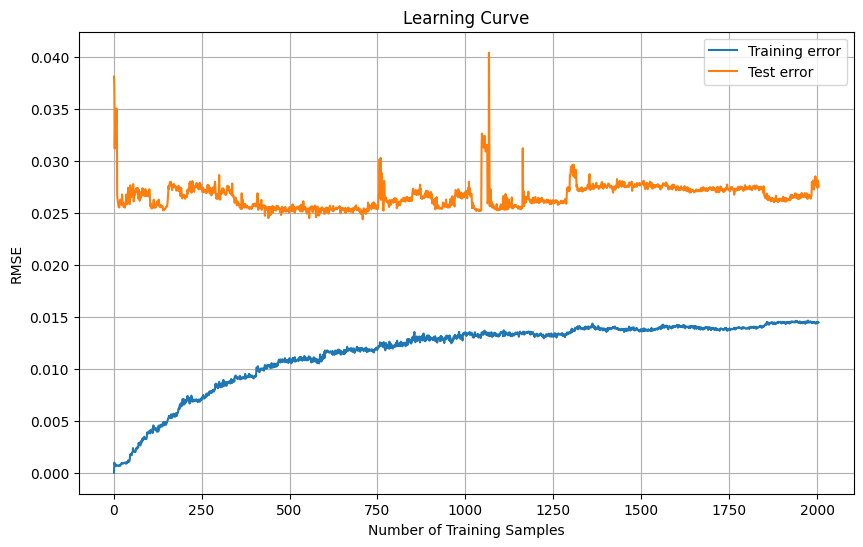


Tuning regularization parameters:
Alpha: 0.01 -> Test RMSE: 0.0276
Alpha: 0.1 -> Test RMSE: 0.0261
Alpha: 0.5 -> Test RMSE: 0.0254
Alpha: 1.0 -> Test RMSE: 0.0253


In [24]:
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Function to check for overfitting
def check_overfitting(model, X_train, y_train, X_test, y_test, cv=5):
    # 1. Check Training vs Test Performance
    # Fit the model on the training data
    model.fit(X_train, y_train)
    
    # Predict on training and test data
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Calculate performance metrics (RMSE and R^2) on both training and test data
    train_rmse = mean_squared_error(y_train, y_train_pred, squared=False)
    test_rmse = mean_squared_error(y_test, y_test_pred, squared=False)
    
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)
    
    print(f"Training RMSE: {train_rmse:.4f}")
    print(f"Test RMSE: {test_rmse:.4f}")
    print(f"Training R²: {train_r2:.4f}")
    print(f"Test R²: {test_r2:.4f}")
    
    if train_rmse < test_rmse:
        print("Potential overfitting: Training RMSE is lower than Test RMSE.")
    else:
        print("Model seems to generalize well between training and test sets.")
    
    # 2. Check Cross-validation Performance
    cv_scores = cross_val_score(model, X_train, y_train, cv=cv, scoring='neg_mean_squared_error')
    cv_rmse = np.sqrt(-cv_scores)
    print(f"Cross-Validation RMSE: {cv_rmse.mean():.4f} ± {cv_rmse.std():.4f}")
    
    # 3. Plot Learning Curves
    train_errors, test_errors = [], []
    for m in range(1, len(X_train) + 1):
        model.fit(X_train[:m], y_train[:m])
        train_errors.append(mean_squared_error(y_train[:m], model.predict(X_train[:m]), squared=False))
        test_errors.append(mean_squared_error(y_test, model.predict(X_test), squared=False))
    
    plt.figure(figsize=(10, 6))
    plt.plot(np.arange(1, len(X_train) + 1), train_errors, label="Training error")
    plt.plot(np.arange(1, len(X_train) + 1), test_errors, label="Test error")
    plt.title("Learning Curve")
    plt.xlabel("Number of Training Samples")
    plt.ylabel("RMSE")
    plt.legend()
    plt.grid(True)
    plt.show()

    # 4. Try Regularization (if needed)
    print("\nTuning regularization parameters:")
    for alpha in [0.01, 0.1, 0.5, 1.0]:
        model.set_params(reg_alpha=alpha)
        model.fit(X_train, y_train)
        y_test_pred = model.predict(X_test)
        test_rmse = mean_squared_error(y_test, y_test_pred, squared=False)
        print(f"Alpha: {alpha} -> Test RMSE: {test_rmse:.4f}")

# Example: Call the function with your model and data
# Assuming `best_model` is the trained XGBoost model and X_train, X_test, y_train, y_test are your data splits
check_overfitting(XG_model, X_train, y_train, X_test, y_test)


Training RMSE: 0.0152
Test RMSE: 0.0259
Training R²: 0.1600
Test R²: -0.0574
Potential overfitting: Training RMSE is lower than Test RMSE.
Cross-Validation RMSE: 0.0169 ± 0.0015


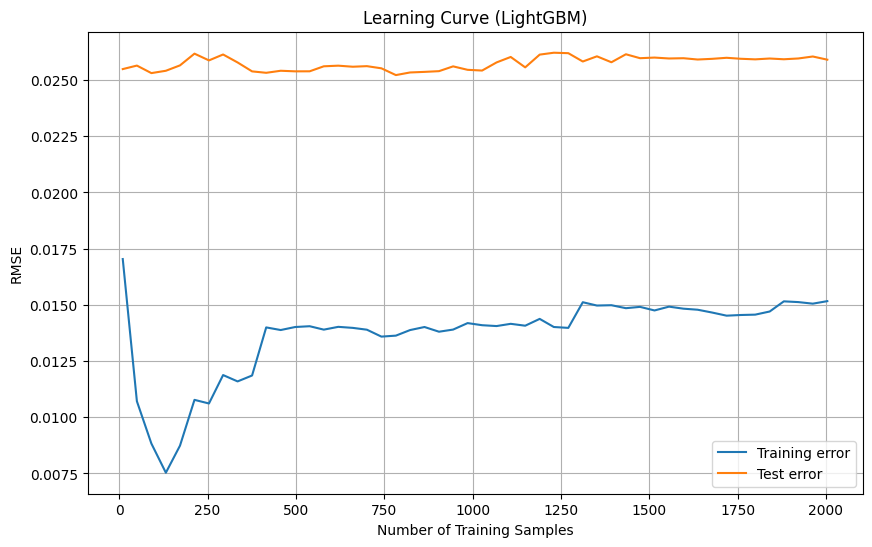


Tuning reg_alpha regularization:
reg_alpha: 0 -> Test RMSE: 0.0259
reg_alpha: 0.1 -> Test RMSE: 0.0259
reg_alpha: 0.5 -> Test RMSE: 0.0254
reg_alpha: 1.0 -> Test RMSE: 0.0253
reg_alpha: 5.0 -> Test RMSE: 0.0253


In [25]:
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import lightgbm as lgb

# Function to check overfitting for LightGBM
def check_overfitting_lgbm(model, X_train, y_train, X_test, y_test, cv=5):
    # 1. Fit the model
    model.set_params(verbose=-1)  # suppress warnings globally
    model.fit(X_train, y_train)
    
    # Predict
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Metrics
    train_rmse = mean_squared_error(y_train, y_train_pred, squared=False)
    test_rmse = mean_squared_error(y_test, y_test_pred, squared=False)
    
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)
    
    print(f"Training RMSE: {train_rmse:.4f}")
    print(f"Test RMSE: {test_rmse:.4f}")
    print(f"Training R²: {train_r2:.4f}")
    print(f"Test R²: {test_r2:.4f}")
    
    if train_rmse < test_rmse:
        print("Potential overfitting: Training RMSE is lower than Test RMSE.")
    else:
        print("Model generalizes well between training and test sets.")
    
    # 2. Cross-validation performance
    cv_scores = cross_val_score(model, X_train, y_train, cv=cv, scoring='neg_mean_squared_error')
    cv_rmse = np.sqrt(-cv_scores)
    print(f"Cross-Validation RMSE: {cv_rmse.mean():.4f} ± {cv_rmse.std():.4f}")
    
    # 3. Learning Curve
    train_errors, test_errors = [], []
    sample_points = np.linspace(10, len(X_train), 50, dtype=int)
    for m in sample_points:
        temp_model = lgb.LGBMRegressor(**model.get_params())
        temp_model.set_params(verbose=-1)  # suppress warnings
        temp_model.fit(X_train[:m], y_train[:m])
        train_errors.append(mean_squared_error(y_train[:m], temp_model.predict(X_train[:m]), squared=False))
        test_errors.append(mean_squared_error(y_test, temp_model.predict(X_test), squared=False))
    
    plt.figure(figsize=(10, 6))
    plt.plot(sample_points, train_errors, label="Training error")
    plt.plot(sample_points, test_errors, label="Test error")
    plt.title("Learning Curve (LightGBM)")
    plt.xlabel("Number of Training Samples")
    plt.ylabel("RMSE")
    plt.legend()
    plt.grid(True)
    plt.show()
    
    # 4. Test Regularization
    print("\nTuning reg_alpha regularization:")
    for alpha in [0, 0.1, 0.5, 1.0, 5.0]:
        temp_model = lgb.LGBMRegressor(**model.get_params())
        temp_model.set_params(reg_alpha=alpha, verbose=-1)  # suppress warnings
        temp_model.fit(X_train, y_train)
        y_test_pred = temp_model.predict(X_test)
        test_rmse = mean_squared_error(y_test, y_test_pred, squared=False)
        print(f"reg_alpha: {alpha} -> Test RMSE: {test_rmse:.4f}")

# Example usage:
check_overfitting_lgbm(light_model, X_train, y_train, X_test, y_test)


# Kijken naar Shap Values en Feature Importance

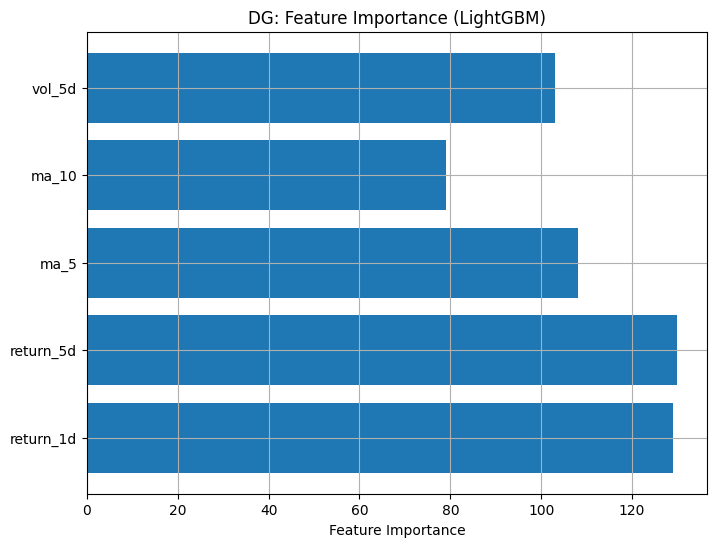

In [27]:
# Feature Importance (LightGBM ingebouwd)
importances = light_model.feature_importances_
feature_names = X_train.columns

# Plot
plt.figure(figsize=(8, 6))
plt.barh(feature_names, importances)
plt.xlabel('Feature Importance')
plt.title(f'{ticker}: Feature Importance (LightGBM)')
plt.grid(True)
plt.show()


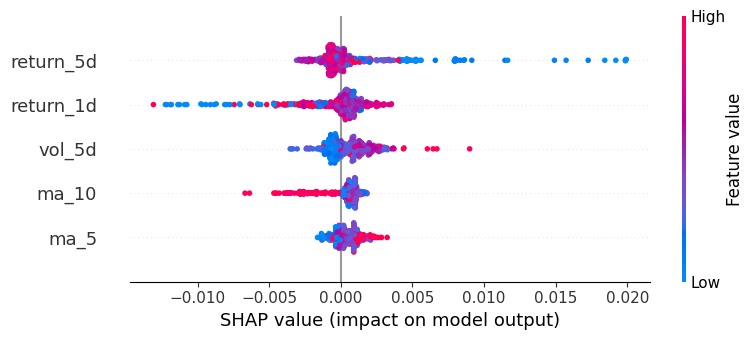

In [28]:
import shap

# Zorg dat shap geïnstalleerd is
# pip install shap

# Maak explainer voor jouw getrainde LightGBM model
explainer = shap.Explainer(light_model)

# Bereken SHAP-waarden voor de testset
shap_values = explainer(X_test)


shap.summary_plot(shap_values, X_test, show=False)
plt.savefig(f"{ticker}_shap_summary.png", bbox_inches='tight')


